### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification


- This data consists of two columns.

| Text | Label | 
| --- | --- |
| Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece. | Clothing & Accessories | 
|IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012|Electronics|
|Operating Systems in Depth About the Author Professor Doeppner is an associate professor of computer science at Brown University. His research interests include mobile computing in education, mobile and ubiquitous computing, operating systems and distribution systems, parallel computing, and security.|Books|

- ***Text***: Description of an item sold on e-commerce website
- ***Label***: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [1]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [2]:
df['label'].value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

- From the above, we can see that almost all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.


In [3]:
df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


<h3>Train test split</h3>

- Build a model with original text (no pre processing)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [6]:
X_train.head(5)

15820    IRIS Furniture Children Deluxe Spiderman Toddl...
23224    Godox CB-09 Hard Carrying Storage Suitcase Car...
4638     Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245    Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378     Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...
Name: Text, dtype: object

In [7]:
y_train.value_counts()

label_num
0    4800
2    4800
3    4800
1    4800
Name: count, dtype: int64

In [8]:
y_test.value_counts()

label_num
0    1200
2    1200
3    1200
1    1200
Name: count, dtype: int64

**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**
- use TF-IDF for pre-processing the text.

- use **KNN** as the classifier 
- print the classification report.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [10]:
X_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [11]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [12]:
y_pred[:5]

array([0, 2, 3, 1, 0], dtype=int64)

In [13]:
X_test[20706]

'Lal Haveli Designer Handmade Patchwork Decorative Silk Floor Ottoman Cover Footstool From Handmade Expressions, a fair trade group sometimes all you need is one work of art to bring an entire room together. Silk fabric - they all lend a hand in giving this handcrafted ottoman its fantastic worldly flavor. Because each is handmade using recycled textiles, no two are exactly alike. Indian ottomans and floor pillows look great in any setting, and are a great and affordable way to add some comfortable seating for your guests!'

In [14]:
text1 = '''
Bring warmth and charm to your dining space with this handwoven cotton table runner, 
crafted by skilled artisans. Featuring intricate patterns and a soft, durable texture, 
this piece blends effortlessly with any décor, from rustic to modern. Made with eco-friendly, 
sustainable materials, each runner tells a story of tradition and craftsmanship. Whether for 
everyday use or special occasions, it’s the perfect way to elevate your table setting with a touch of handcrafted elegance.
'''

In [15]:
text2 = '''
A perfect blend of nostalgia and technology, this Retro Bluetooth Wooden Speaker brings rich, 
high-quality sound wrapped in a classic wooden frame. Inspired by vintage radios, it features modern Bluetooth connectivity,
allowing you to stream your favorite music wirelessly. With a built-in rechargeable battery and easy-to-use controls, 
this speaker is both stylish and functional. Whether on your desk or in your living room, it’s a statement piece that 
delivers timeless aesthetics and exceptional sound.
'''

In [16]:
text3 = '''
Wrap yourself in elegance with this handwoven Pashmina wool shawl, crafted from the finest wool fibers for 
unmatched softness and warmth. Designed with intricate patterns and delicate fringes, each piece is a testament to 
traditional craftsmanship, making it a wardrobe essential for any season. Whether draped over your shoulders on a 
chilly evening or styled with casual wear, this versatile accessory adds a touch of sophistication to any outfit.
'''

In [17]:
text4 = '''
Step into the world of literary brilliance with "Timeless Wisdom," a handpicked collection of the most celebrated 
classic novels and philosophical works. From thought-provoking prose to unforgettable storytelling, this anthology 
brings together iconic authors whose words have shaped generations. Whether you’re a seasoned reader or new to classic 
literature, this beautifully bound edition is a treasure trove of knowledge, imagination, and profound insights—perfect for any bookshelf.
'''

In [18]:
category = clf.predict([text1])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Household


In [19]:
category = clf.predict([text2])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Electronics


In [20]:
category = clf.predict([text3])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Clothing & Accessories


In [21]:
category = clf.predict([text4])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Books


All Predictions are correct

**Attempt 2** :

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**
- use TF-IDF for pre-processing the text.

- use **MultinomialNB** as the classifier.
- print the classification report.

In [22]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [23]:
category = clf.predict([text1])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Household


In [24]:
category = clf.predict([text2])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Electronics


In [25]:
category = clf.predict([text3])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Clothing & Accessories


In [26]:
category = clf.predict([text4])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Books


**Attempt 3** :

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**
- use TF-IDF for pre-processing the text.

- use **Random Forest** as the classifier.
- print the classification report.

In [27]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [28]:
category = clf.predict([text1])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Household


In [29]:
category = clf.predict([text2])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Electronics


In [30]:
category = clf.predict([text3])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Clothing & Accessories


In [31]:
category = clf.predict([text4])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Books


<b>Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [32]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [33]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [34]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer woman Art Mysore Silk Saree Bl...


In [35]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [36]:
df.preprocessed_txt[0]

'Urban Ladder Eisner Low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

<b>Build a model with pre processed text

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

**Let's check the scores with our best model till now**
- Random Forest

In [38]:
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [39]:
category = clf.predict([text1])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Household


In [40]:
category = clf.predict([text2])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Electronics


In [41]:
category = clf.predict([text3])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Clothing & Accessories


In [42]:
category = clf.predict([text4])

if category == 0:
    print("Household")
elif category == 1:
    print("Books")
elif category == 2:
    print("Electronics")
elif category == 3:
    print("Clothing & Accessories")

Books


<b>Plot confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1161,    7,   17,   15],
       [  18, 1174,    5,    3],
       [  17,    8, 1172,    3],
       [   7,    6,    1, 1186]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

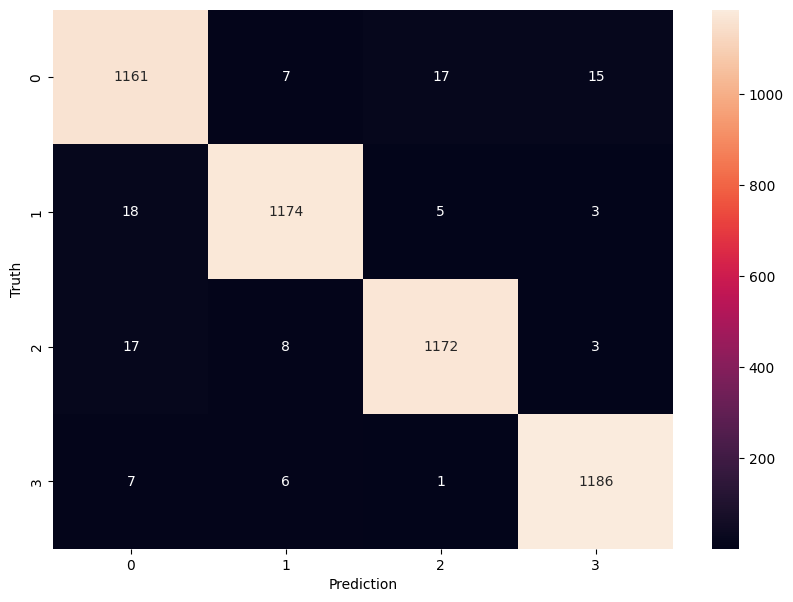

In [44]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')